# Data Vizualization Final Project Part# 1

1. What is the "name" of the dataset?

Ans: The name of the data is "Novel Corona Virus 2019 Dataset."

2. Where did you obtain it?

Ans. I found this dataset on Kaggle.

3. Where can we obtain it? (i.e., URL)

Ans. You can find this dataset from (URL): https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset/data#

4. What is the license of the dataset? What are we allowed to do with it?

Ans. License: Data files © Original Authors. According to the terms of the use as mentioned, this dataset is provided to to the public strictly for educational and academic research purposes.

5. How big is it in file size and in items?

Ans. This dataset has 8 csv files. These files contains information like deaths by cities, by countries, total number of confirmed cases, total number of deaths, number of recovered patients etc. Thes files also contains data that is arranged date-wise from 22nd January to 10th April.
The size of this dataset is 6MB.


As these datasets were obtained from Kaggle, these were already cleaned and was in ready to perofrm analysis format.

# Initial Data Analysis and Visualizations

In [21]:
# importing required modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set()

In [2]:
# loading the files required for analysis

covid_data=pd.read_csv("C:/Users/rajku/COVID-19 dataset/covid_19_data.csv", header=0)
covid19_time_series_confirmed=pd.read_csv("C:/Users/rajku/COVID-19 dataset/time_series_covid_19_confirmed.csv", header=0)
covid19_time_series_confirmed_US=pd.read_csv("C:/Users/rajku/COVID-19 dataset/time_series_covid_19_confirmed_US.csv", header=0)
covid19_time_series_deaths=pd.read_csv("C:/Users/rajku/COVID-19 dataset/time_series_covid_19_deaths.csv", header=0)
covid19_time_series_deaths_US=pd.read_csv("C:/Users/rajku/COVID-19 dataset/time_series_covid_19_deaths_US.csv", header=0)

In [3]:
# printing the shape of the data

data=[covid_data, covid19_time_series_confirmed, covid19_time_series_confirmed_US, covid19_time_series_deaths, covid19_time_series_deaths_US]
for df in data:
    print(df.shape)

(13850, 8)
(264, 84)
(3253, 91)
(264, 84)
(3253, 92)


In [4]:
# converting the column names of some files which required some changes

covid_data.rename(columns={'Province/State':'State', 'Country/Region':'Country'}, inplace=True)
covid19_time_series_confirmed.rename(columns={'Province/State':'State', 'Country/Region':'Country'}, inplace=True)
covid19_time_series_deaths.rename(columns={'Province/State':'State', 'Country/Region':'Country'}, inplace=True)

# Summary of the files

Covid_19 files contains 8 columns namely "SNo", "ObservationDate", "State", "Country", "LastUpdate", "Confirmed", "Deaths" and "Recovered". The Observation date starts from 01/22/2020 to 04/10/2020. The State contains the regions of a given country and the Country represents the country. The Confirmed, Deaths and Recovered columns shows the number of confirmed cases, deaths due to covid and patients that recovered from covid till the given Observation Date.

times_series_Covid_19_confirmed file contains columns like UID (Unique id for the given state and country), State, Country, Latitude, Longitude, and the Dates starting from 01/22/2020 to 04/10/2020 as columns.

times_series_Covid_19_confirmed_US contains columns like UIS, Admin2(county), State, Country, Latitude, Longitude, and the Dates starting from 01/22/2020 to 04/10/2020 as columns. These files will be used to plot interactive plots and graphs.

times_series_Covid_19_deaths file is similar to time_series_covid_19_confirmed file with the same columns. The only difference here is that this files contains the number of deaths rather than the number of confirmed cases with the same starting date where days are columns.

time_series_covid_19_deaths_US is similar to time_series_covid_19_confirmed file with the same columns. The only difference here is that this files contains the number of deaths in US rather than the number of confirmed cases in the US with the same starting date where days are columns.

In [5]:
covid_data.head()

,SNo,ObservationDate,State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [6]:
# modication of "covid_data" dataset first and visualizing the data only for this dataset first

covid_data['State']=covid_data['State'].mask(pd.isnull, covid_data['Country'])
covid_data['Last Update']=covid_data['Last Update'].apply(lambda x: x.split('T')[0] and x.split()[0])
latest_covid_data=covid_data.sort_values(by=['State', 'ObservationDate'], ascending=[True, True]).groupby(['State', 'Country']).tail(1)
latest_covid_data.head(10)

,SNo,ObservationDate,State,Country,Last Update,Confirmed,Deaths,Recovered
2663,2664,02/28/2020,Azerbaijan,Azerbaijan,2020-02-28T15:03:26,1.0,0.0,0.0
4117,4118,03/08/2020,"Montreal, QC",Canada,2020-03-08T16:03:05,4.0,0.0,0.0
3903,3904,03/07/2020,"Norfolk County, MA",US,2020-03-06T18:33:03,2.0,0.0,0.0
4674,4675,03/10/2020,"('St. Martin',)","('St. Martin',)",2020-03-10T05:33:02,2.0,0.0,0.0
13529,13530,04/10/2020,Afghanistan,Afghanistan,2020-04-10,521.0,15.0,32.0
13710,13711,04/10/2020,Alabama,US,2020-04-10,2947.0,80.0,0.0
4413,4414,03/09/2020,"Alameda County, CA",US,2020-03-07T13:13:14,2.0,0.0,0.0
13711,13712,04/10/2020,Alaska,US,2020-04-10,246.0,7.0,0.0
13530,13531,04/10/2020,Albania,Albania,2020-04-10,416.0,23.0,182.0
13712,13713,04/10/2020,Alberta,Canada,2020-04-10,1451.0,32.0,0.0


In [7]:
# Sorting the values according to confirmed cases in descending order and extract only top 30 value to plot

confirm_vs_death = latest_covid_data.sort_values(by=['Confirmed', 'Deaths', 'Recovered'], ascending=False)[:30]
confirm_vs_death['State_Country']=confirm_vs_death['State']+" - "+confirm_vs_death["Country"]
confirm_vs_death["Death_%"] = round((confirm_vs_death["Deaths"]/confirm_vs_death["Confirmed"])*100,2) # calcuating the death percentage for given city
confirm_vs_death.head(20)

,SNo,ObservationDate,State,Country,Last Update,Confirmed,Deaths,Recovered,State_Country,Death_%
13794,13795,04/10/2020,New York,US,2020-04-10,172348.0,7867.0,0.0,New York - US,4.56
13682,13683,04/10/2020,Spain,Spain,2020-04-10,158273.0,16081.0,55668.0,Spain - Spain,10.16
13609,13610,04/10/2020,Italy,Italy,2020-04-10,147577.0,18849.0,30455.0,Italy - Italy,12.77
13586,13587,04/10/2020,France,France,2020-04-10,124869.0,13197.0,24932.0,France - France,10.57
13590,13591,04/10/2020,Germany,Germany,2020-04-10,122171.0,2767.0,53913.0,Germany - Germany,2.26
13697,13698,04/10/2020,UK,UK,2020-04-10,73758.0,8958.0,344.0,UK - UK,12.15
13605,13606,04/10/2020,Iran,Iran,2020-04-10,68192.0,4232.0,35465.0,Iran - Iran,6.21
13758,13759,04/10/2020,Hubei,Mainland China,2020-04-10,67803.0,3216.0,64236.0,Hubei - Mainland China,4.74
13791,13792,04/10/2020,New Jersey,US,2020-04-10,54588.0,1932.0,0.0,New Jersey - US,3.54
13696,13697,04/10/2020,Turkey,Turkey,2020-04-10,47029.0,1006.0,2423.0,Turkey - Turkey,2.14


Text(0, 0.5, 'Death percentage')

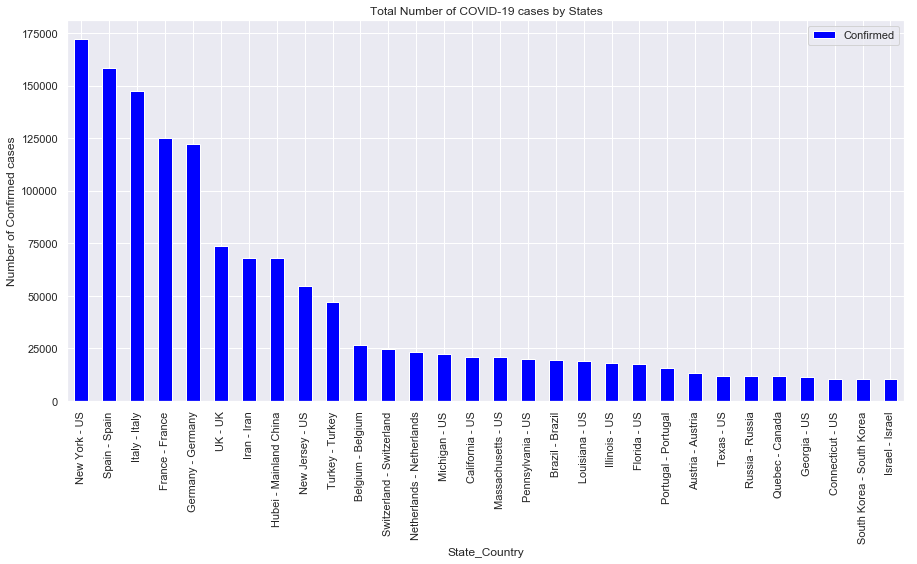

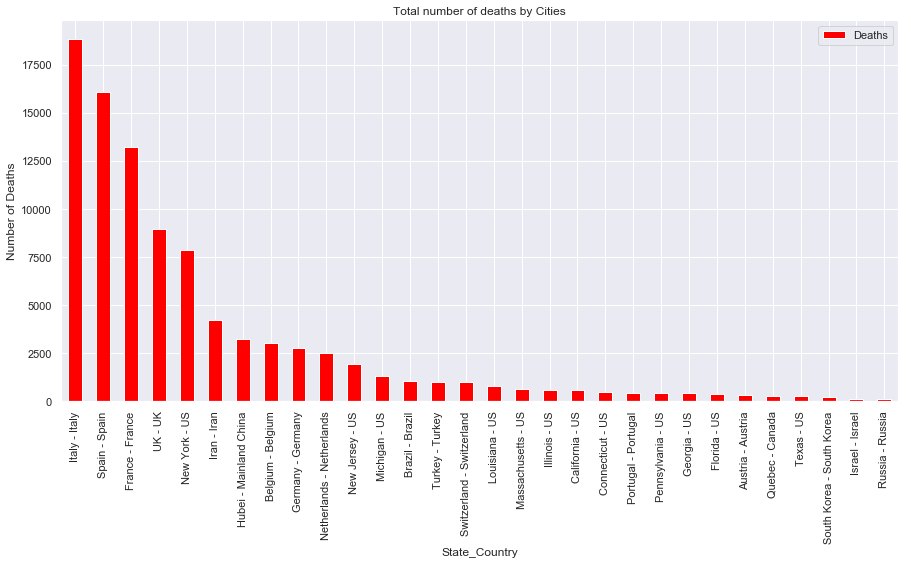

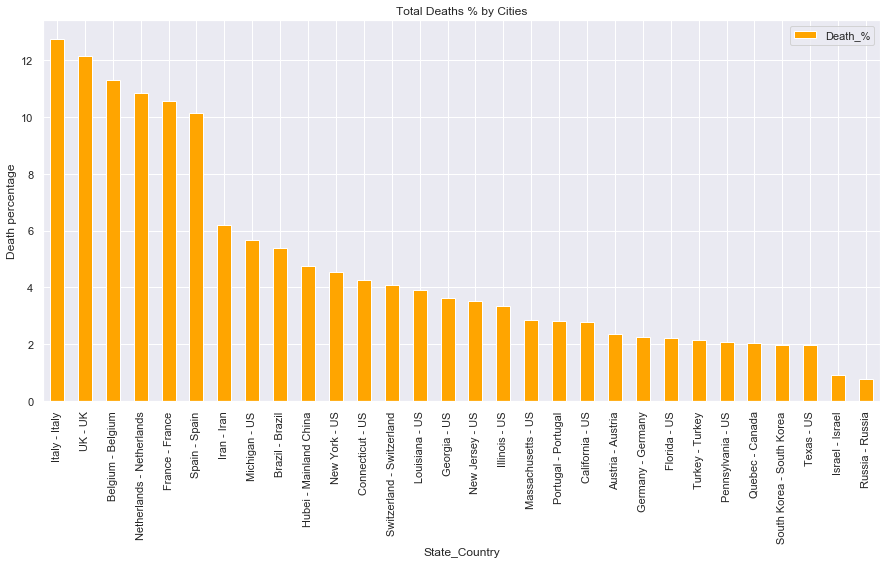

In [8]:
# bar graph to check the trend in confirmed cases, deaths and death % due to COVID-19 citywise

ax1=confirm_vs_death.plot(x="State_Country", y="Confirmed", kind="bar",color='blue', figsize=(15,7), title="Total Number of COVID-19 cases by States")
ax1.set_ylabel("Number of Confirmed cases")

ax2=confirm_vs_death.sort_values(by='Deaths', ascending=False)[["Deaths","State_Country"]].plot(x="State_Country", y= "Deaths", kind="bar",color='red', figsize=(15,7), title="Total number of deaths by Cities")
ax2.set_ylabel("Number of Deaths")

ax3=confirm_vs_death.sort_values(by='Death_%', ascending=False)[["Death_%","State_Country"]].plot(x="State_Country", y="Death_%",kind="bar",color='orange', figsize=(15,7), title="Total Deaths % by Cities")
ax3.set_ylabel("Death percentage")

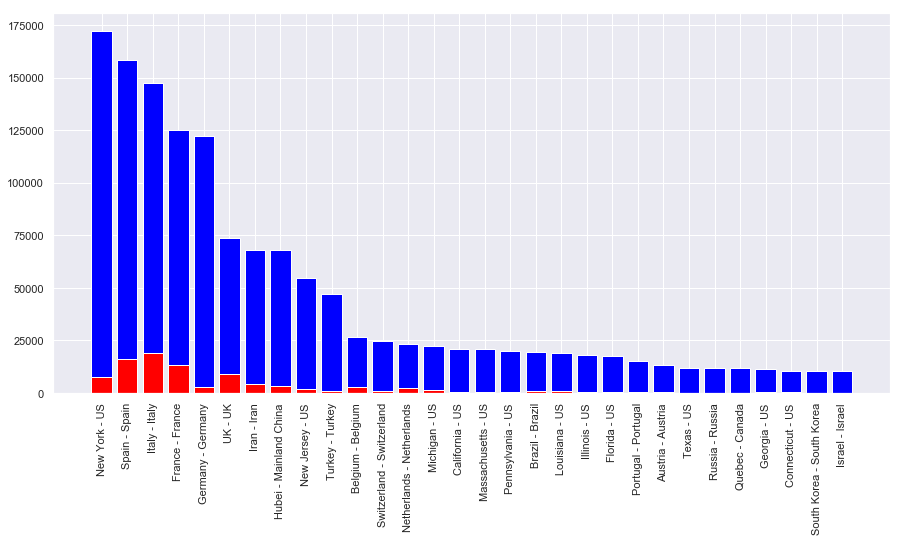

In [9]:
# stacked bar graph showing confirmed and death cases

plt.figure(figsize=(15,7))

plt.bar(x=confirm_vs_death['State_Country'], height=confirm_vs_death['Confirmed'], color='blue')
plt.bar(x=confirm_vs_death['State_Country'], height=confirm_vs_death['Deaths'], color='red')
#plt.bar(x=confirm_vs_death['State_Country'], height=confirm_vs_death['Recovered'], color='orange')
plt.xticks(rotation=90)
plt.show()

In [10]:
#Extracting only those cities where the Recovered cases is not Zero. For example, in the dataset, for a given city in the US, the
# number of recovered cases is not given. Rahter, total number of reovered cases in the entire US is given. So, in the below
# analysis, we have removed the US cities as the number of recovered cases info according to city was not present in the dataset.

confirmed_vs_recovered=latest_covid_data.sort_values(by=['Confirmed', 'Deaths', 'Recovered'], ascending=False).loc[latest_covid_data['Recovered']!=0][:30]
confirmed_vs_recovered

,SNo,ObservationDate,State,Country,Last Update,Confirmed,Deaths,Recovered
13682,13683,04/10/2020,Spain,Spain,2020-04-10,158273.0,16081.0,55668.0
13609,13610,04/10/2020,Italy,Italy,2020-04-10,147577.0,18849.0,30455.0
13586,13587,04/10/2020,France,France,2020-04-10,124869.0,13197.0,24932.0
13590,13591,04/10/2020,Germany,Germany,2020-04-10,122171.0,2767.0,53913.0
13697,13698,04/10/2020,UK,UK,2020-04-10,73758.0,8958.0,344.0
13605,13606,04/10/2020,Iran,Iran,2020-04-10,68192.0,4232.0,35465.0
13758,13759,04/10/2020,Hubei,Mainland China,2020-04-10,67803.0,3216.0,64236.0
13696,13697,04/10/2020,Turkey,Turkey,2020-04-10,47029.0,1006.0,2423.0
13544,13545,04/10/2020,Belgium,Belgium,2020-04-10,26667.0,3019.0,5568.0
13687,13688,04/10/2020,Switzerland,Switzerland,2020-04-10,24551.0,1002.0,11100.0


In [11]:
confirmed_vs_recovered['State_Country']=confirmed_vs_recovered['State']+" - "+confirmed_vs_recovered["Country"]
confirmed_vs_recovered["Death_%"] = round((confirmed_vs_recovered["Deaths"]/confirmed_vs_recovered["Confirmed"])*100,2) # calculating death %
confirmed_vs_recovered.head(30)


,SNo,ObservationDate,State,Country,Last Update,Confirmed,Deaths,Recovered,State_Country,Death_%
13682,13683,04/10/2020,Spain,Spain,2020-04-10,158273.0,16081.0,55668.0,Spain - Spain,10.16
13609,13610,04/10/2020,Italy,Italy,2020-04-10,147577.0,18849.0,30455.0,Italy - Italy,12.77
13586,13587,04/10/2020,France,France,2020-04-10,124869.0,13197.0,24932.0,France - France,10.57
13590,13591,04/10/2020,Germany,Germany,2020-04-10,122171.0,2767.0,53913.0,Germany - Germany,2.26
13697,13698,04/10/2020,UK,UK,2020-04-10,73758.0,8958.0,344.0,UK - UK,12.15
13605,13606,04/10/2020,Iran,Iran,2020-04-10,68192.0,4232.0,35465.0,Iran - Iran,6.21
13758,13759,04/10/2020,Hubei,Mainland China,2020-04-10,67803.0,3216.0,64236.0,Hubei - Mainland China,4.74
13696,13697,04/10/2020,Turkey,Turkey,2020-04-10,47029.0,1006.0,2423.0,Turkey - Turkey,2.14
13544,13545,04/10/2020,Belgium,Belgium,2020-04-10,26667.0,3019.0,5568.0,Belgium - Belgium,11.32
13687,13688,04/10/2020,Switzerland,Switzerland,2020-04-10,24551.0,1002.0,11100.0,Switzerland - Switzerland,4.08


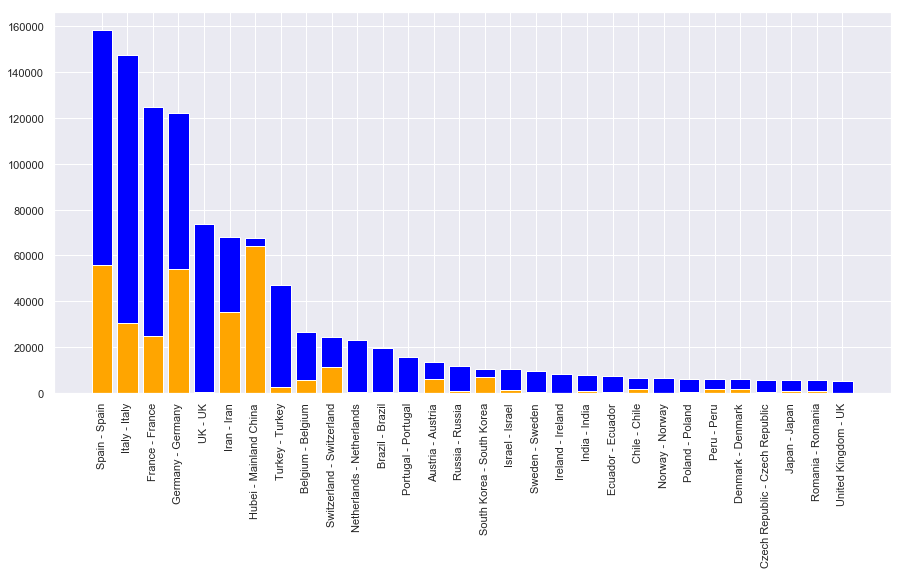

In [12]:
# stacked bar plot for confirmed vs recovered cases

plt.figure(figsize=(15,7))

plt.bar(x=confirmed_vs_recovered['State_Country'], height=confirmed_vs_recovered['Confirmed'], color='blue')
plt.bar(x=confirmed_vs_recovered['State_Country'], height=confirmed_vs_recovered['Recovered'], color='orange')
plt.xticks(rotation=90)
plt.show()

# Country-wise analysis of confirmed, deaths and recovered cases

In [13]:

countrywise_covid_data=latest_covid_data.groupby("Country", as_index=False)["Confirmed", "Deaths", "Recovered"].sum()
countrywise_covid_data['Death_%']=round((countrywise_covid_data['Deaths']/countrywise_covid_data['Confirmed'])*100, 2) # calculating death %
countrywise_covid_data['Recovery_%']=round((countrywise_covid_data['Recovered']/countrywise_covid_data['Confirmed'])*100, 2) # calculating recovery %
countrywise_covid_data.tail()

,Country,Confirmed,Deaths,Recovered,Death_%,Recovery_%
215,Western Sahara,4.0,0.0,0.0,0.00,0.0
216,Yemen,1.0,0.0,0.0,0.00,0.0
217,Zambia,40.0,2.0,25.0,5.00,62.5
218,Zimbabwe,13.0,3.0,0.0,23.08,0.0
219,occupied Palestinian territory,0.0,0.0,0.0,NaN,NaN


In [14]:
countrywise_covid_data=countrywise_covid_data[countrywise_covid_data['Confirmed']!=0] # extracting only those rows where confirmed values is not Zero
countrywise_covid_data.tail()

,Country,Confirmed,Deaths,Recovered,Death_%,Recovery_%
214,West Bank and Gaza,267.0,2.0,45.0,0.75,16.85
215,Western Sahara,4.0,0.0,0.0,0.00,0.00
216,Yemen,1.0,0.0,0.0,0.00,0.00
217,Zambia,40.0,2.0,25.0,5.00,62.50
218,Zimbabwe,13.0,3.0,0.0,23.08,0.00


In [15]:
countrywise_covid_data.sort_index(by='Confirmed', ascending=False, inplace=True) # sorting the data by Confirmed column in descending order
countrywise_covid_data.head()

,Country,Confirmed,Deaths,Recovered,Death_%,Recovery_%
205,US,497223.0,18609.0,28975.0,3.74,5.83
186,Spain,158273.0,16081.0,55668.0,10.16,35.17
100,Italy,147577.0,18849.0,30455.0,12.77,20.64
69,France,125936.0,13215.0,25195.0,10.49,20.01
75,Germany,122176.0,2767.0,53913.0,2.26,44.13


Text(0, 0.5, 'Death percentage')

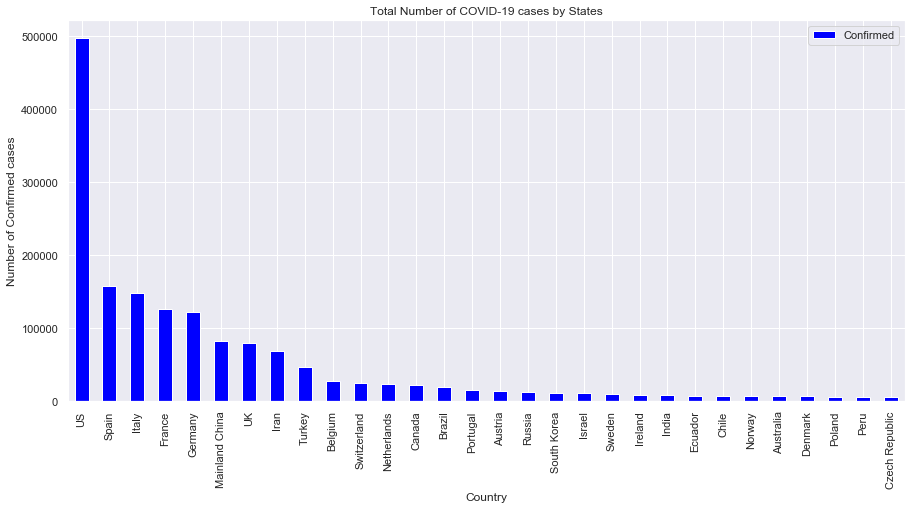

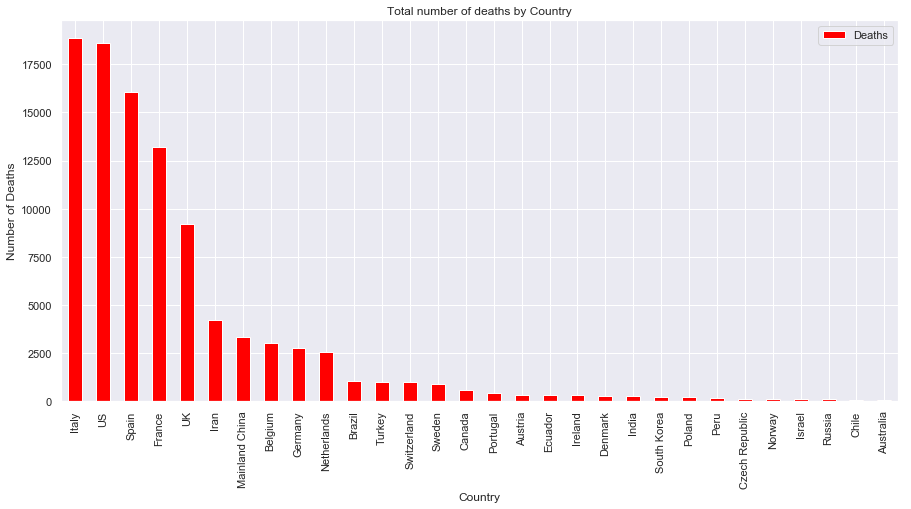

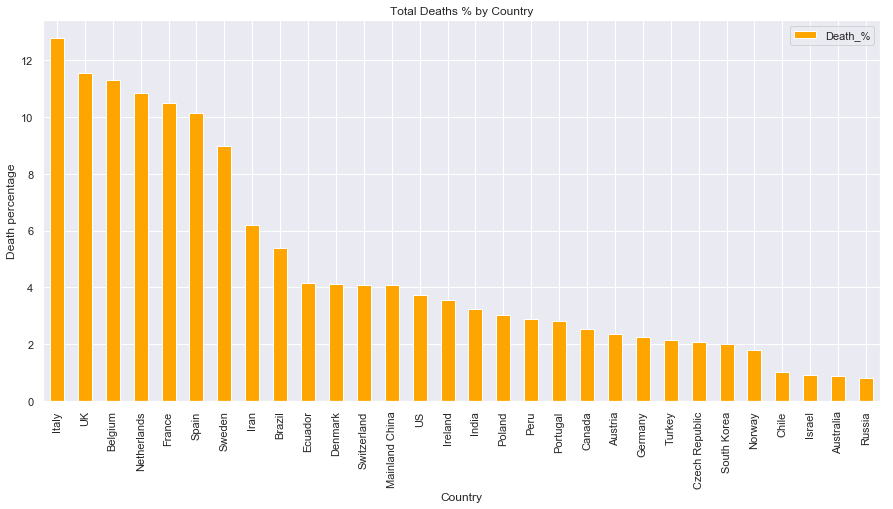

In [16]:
countrywise_covid_data=countrywise_covid_data[:30] # extracting only top 30 countries with most number of covid cases

ax1=countrywise_covid_data.plot(x="Country", y="Confirmed", kind="bar",color='blue', figsize=(15,7), title="Total Number of COVID-19 cases by States")
ax1.set_ylabel("Number of Confirmed cases")

ax2=countrywise_covid_data.sort_values(by='Deaths', ascending=False)[["Deaths","Country"]].plot(x="Country", y= "Deaths", kind="bar",color='red', figsize=(15,7), title="Total number of deaths by Country")
ax2.set_ylabel("Number of Deaths")

ax3=countrywise_covid_data.sort_values(by='Death_%', ascending=False)[["Death_%","Country"]].plot(x="Country", y="Death_%",kind="bar",color='orange', figsize=(15,7), title="Total Deaths % by Country")
ax3.set_ylabel("Death percentage")

Text(0, 0.5, 'Recovery percentage')

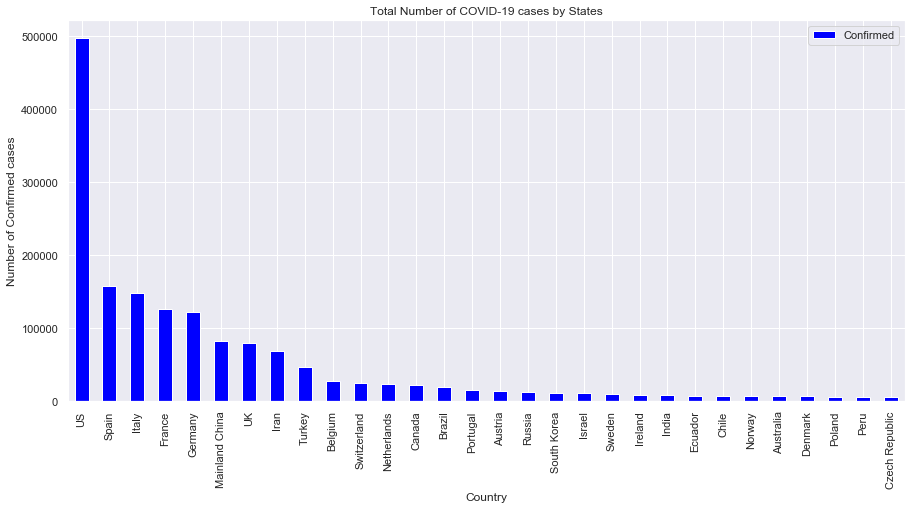

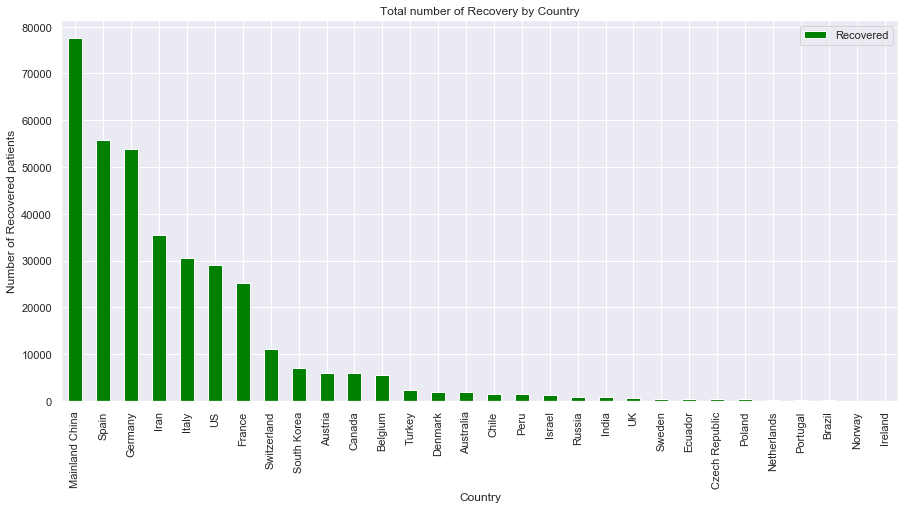

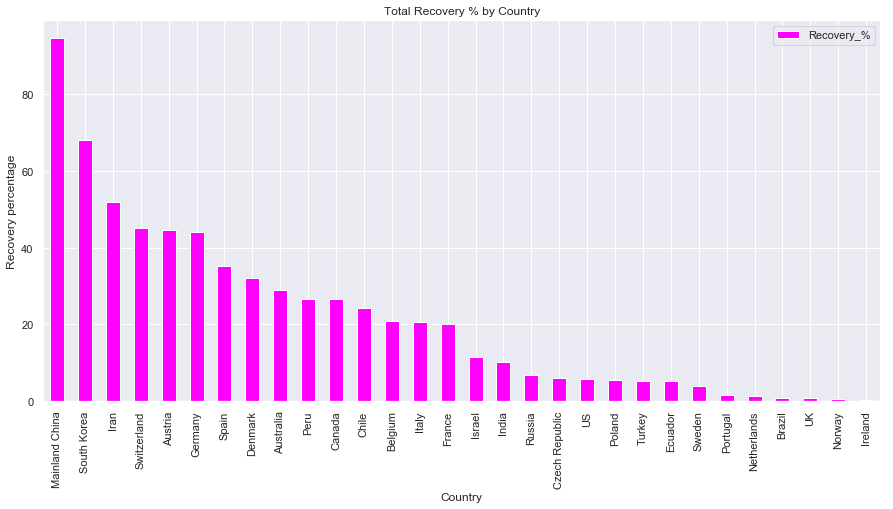

In [17]:
# Recovery and recovery ratio of top 30 countries with most number of covid cases

ax1=countrywise_covid_data.plot(x="Country", y="Confirmed", kind="bar",color='blue', figsize=(15,7), title="Total Number of COVID-19 cases by States")
ax1.set_ylabel("Number of Confirmed cases")

ax2=countrywise_covid_data.sort_values(by='Recovered', ascending=False)[["Recovered","Country"]].plot(x="Country", y= "Recovered", kind="bar",color='green', figsize=(15,7), title="Total number of Recovery by Country")
ax2.set_ylabel("Number of Recovered patients")

ax3=countrywise_covid_data.sort_values(by='Recovery_%', ascending=False)[["Recovery_%","Country"]].plot(x="Country", y="Recovery_%",kind="bar",color='magenta', figsize=(15,7), title="Total Recovery % by Country")
ax3.set_ylabel("Recovery percentage")

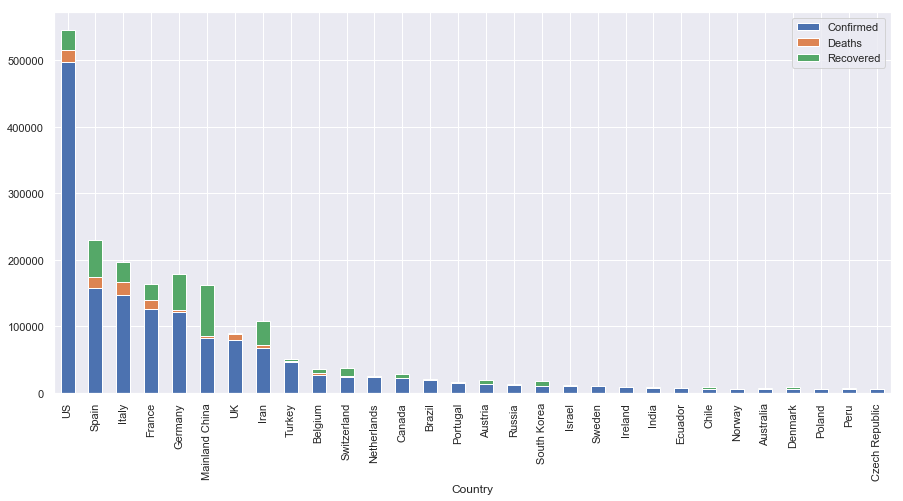

In [18]:
# Stacked bar plot showing Confirmed, Deaths and Recovered cases 

countrywise_covid_data[["Country",'Confirmed', 'Deaths', 'Recovered']].plot.bar(x="Country", stacked=True, figsize=(15,7))

# Things that did and did not work

1. Things that did work: 

a. Using this dataset, I was able to view the number of COVID cases state and countrywise. Is this dataset also contains a file that is US specific, it is possible to view the data county-wise as well. 
b. I was able to make a comparison between the number of confirmed, death and recovered cases state and country wise. It helped me understand the deaths and recovery is not directly proportional to the number of confirmed cases.
c. Time Series analysis will be used to make an interactive plot which is due next week and i beliee it will help in analyzing the time frame where the most number of cases were observed for any given state of country.

2. Things that did not work.

a. The given dataset has data starting from 22nd January 2020, but we know that this disease was started since December 2019. So, this datset do not have data to see how these cases increased between these period and what was the trend in this increase.
b. As the number of deaths and recovery is not proportional to the number of cases, there should be other factors as well that influence these parameters like infected person was already suffering from a disease, age of person etc. These factors would have helped in understanding the relation between the deaths, recovered and confirmed cases.
c. As the dataset did not had the information about the number of recovered patients state wise for US and few other countries, it was not possible to view the recovery rate according to state for the US.
